Hàm này sẽ chuyển đổi các đặc trưng bằng cách scale mỗi đặc trưng về 1 phạm vi nhất định.

Nhờ việc chuẩn hóa này, các thuật toán như linear regression, logistic regression được cải thiện.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,52.222475,10.171967,10.700844,18.045872,20.639292
1,28.296714,1.028798,9.264963,19.341390,20.010032
2,56.962023,6.514236,9.254344,15.738246,20.073748
3,49.022368,6.132646,11.160274,6.606910,22.097376
4,53.748323,10.865621,8.828472,8.704955,20.633749


<AxesSubplot:ylabel='Density'>

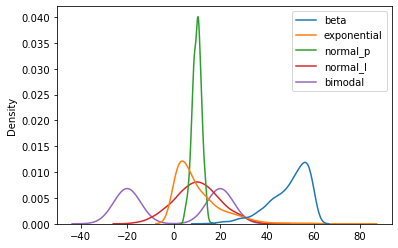

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.652506,10.380050,9.956183,10.143690,-0.029681
std,8.608377,10.230982,1.981880,9.811366,20.179568
min,14.209497,0.024354,4.190994,-18.573807,-28.400247
25%,44.587578,3.020237,8.659202,3.568028,-19.983262
50%,51.872572,6.997559,10.066569,10.076849,0.424661
75%,56.467459,14.458901,11.257106,16.428917,20.144450
max,59.995525,79.347156,16.409080,42.633244,28.437116


<AxesSubplot:ylabel='Density'>

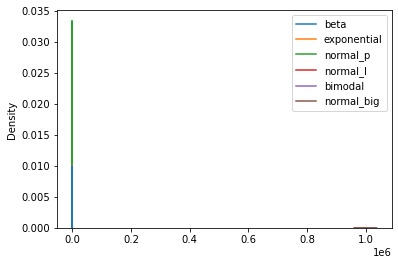

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

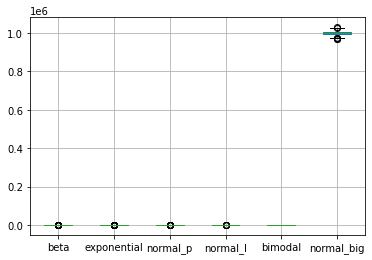

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.830231,0.127928,0.532804,0.598292,0.862805,0.617460
1,0.307675,0.012663,0.415283,0.619458,0.851733,0.634345
2,0.933746,0.081816,0.414414,0.560590,0.852854,0.524692
3,0.760338,0.077005,0.570407,0.411402,0.888458,0.711778
4,0.863557,0.136673,0.379559,0.445680,0.862707,0.508833


<AxesSubplot:ylabel='Density'>

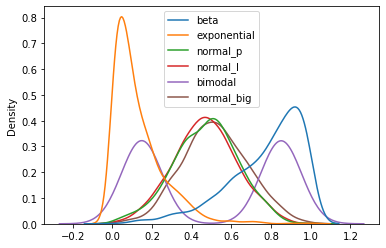

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<AxesSubplot:>

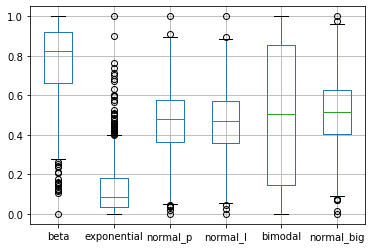

In [13]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [14]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.774101,0.130551,0.471857,0.469186,0.499153,0.517122
std,0.188013,0.128979,0.162209,0.160298,0.355041,0.165660
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.663479,0.037768,0.365704,0.361753,0.148089,0.406836
50%,0.822589,0.087909,0.480892,0.468094,0.507147,0.513900
75%,0.922944,0.181972,0.578332,0.571874,0.854098,0.628001
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [16]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [17]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[14.209497231862471,
 0.024353608137585008,
 4.190993789987765,
 -18.573807184787544,
 -28.4002468632792,
 968765.5313273296]

In [18]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [19]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.99552497546052,
 79.34715587195691,
 16.409079611133315,
 42.63324447207794,
 28.437116309406715,
 1029490.8841389905]

In [20]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 0.9999999999999999, 0.9999999999999999, 1.0, 1.0, 1.0]